# Part 2.10: Supervised Learning - Support Vector Machine (SVM)

Support Vector Machines (SVMs) are powerful and versatile classifiers. The fundamental idea of an SVM is to find a **hyperplane** in an N-dimensional space (where N is the number of features) that distinctly classifies the data points. The optimal hyperplane is the one that has the largest **margin**, i.e., the largest distance between the hyperplane and the nearest data points from either class.

### Key Concepts
- **Hyperplane**: The decision boundary.
- **Margin**: The distance between the hyperplane and the closest data points.
- **Support Vectors**: The data points that are closest to the hyperplane and which define the margin. If these points were moved, the hyperplane would move.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generate non-linear, moon-shaped data
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# SVMs are also sensitive to feature scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### The Kernel Trick
What makes SVMs so powerful is the **kernel trick**. Kernels are functions that take low-dimensional input space and transform it to a higher-dimensional space. This allows SVMs to find a linear separation in the higher-dimensional space, which corresponds to a complex, non-linear decision boundary in the original space.

- **`linear`**: A standard linear hyperplane.
- **`poly`**: A polynomial kernel.
- **`rbf` (Radial Basis Function)**: A popular, powerful default kernel that can create complex, non-linear boundaries.

### Training an SVM Classifier

In [2]:
# C is a regularization parameter: smaller C means a wider margin but more margin violations.
# gamma defines how far the influence of a single training example reaches.
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5)
svm_rbf.fit(X_scaled, y)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,0.5
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Visualizing the Decision Boundary

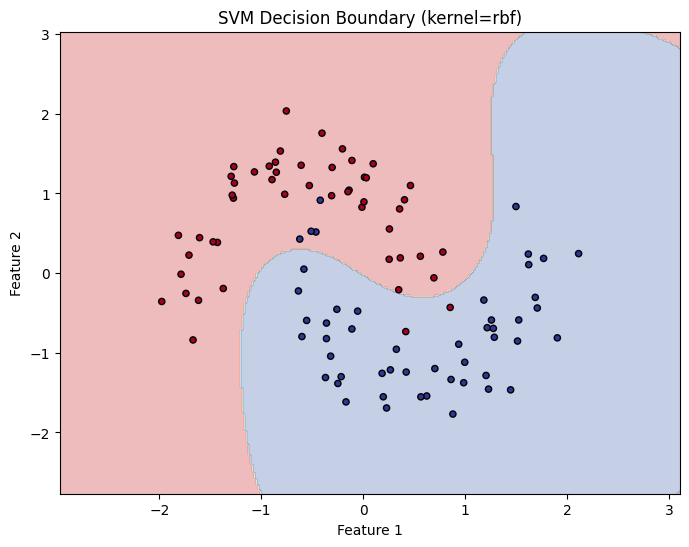

In [3]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(f"SVM Decision Boundary (kernel={clf.kernel})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.figure(figsize=(8, 6))
plot_decision_boundary(svm_rbf, X_scaled, y)
plt.show()